## DATA SET Analysis: 
### - traffic data overview - source, 
### - date :year, month, weekday analysis

In [93]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [18]:
# import filtered US 2017-2019 data
path="../data/YK_all2017-2019_accidents.csv"
traffic_df=pd.read_csv(path)
traffic_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
0,A-9207,MapQuest,201.0,3,2017-01-01 00:17:36,2017-01-01 00:47:12,37.925392,-122.320595,NaN,NaN,...,False,False,False,True,False,Night,Night,Night,Night,2017
1,A-9208,MapQuest,201.0,3,2017-01-01 00:26:08,2017-01-01 01:16:06,37.878185,-122.307175,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2017
2,A-9209,MapQuest,201.0,2,2017-01-01 00:53:41,2017-01-01 01:22:35,38.014820,-121.640579,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2017
3,A-9210,MapQuest,241.0,3,2017-01-01 01:18:51,2017-01-01 01:48:01,37.912056,-122.323982,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2017
4,A-9211,MapQuest,222.0,3,2017-01-01 01:20:12,2017-01-01 01:49:47,37.925392,-122.320595,NaN,NaN,...,False,False,False,True,False,Night,Night,Night,Night,2017


## Count of data by column

In [256]:
traffic_df.count()

ID                       2563837
Source                   2563837
TMC                      1965015
Severity                 2563837
Start_Time               2563837
End_Time                 2563837
Start_Lat                2563837
Start_Lng                2563837
End_Lat                   598822
End_Lng                   598822
Distance(mi)             2563837
Description              2563836
Number                    928610
Street                   2563837
Side                     2563837
City                     2563781
County                   2563837
State                    2563837
Zipcode                  2563073
Country                  2563837
Timezone                 2560804
Airport_Code             2558452
Weather_Timestamp        2530471
Temperature(F)           2514321
Wind_Chill(F)            1080688
Humidity(%)              2511771
Pressure(in)             2520881
Visibility(mi)           2507022
Wind_Direction           2522105
Wind_Speed(mph)          2200487
Precipitat

## Data source analysis by year 

In [313]:
source_df=traffic_df.groupby(['Year','Source']).agg({'ID':'count'}).unstack('Source') # unstacking so we can plot easily
source_df

ID                       
Source    Bing MapQuest MapQuest-Bing
Year                                 
2017    170097   538947          8445
2018    166941   713613         12061
2019    261784   672102         19847

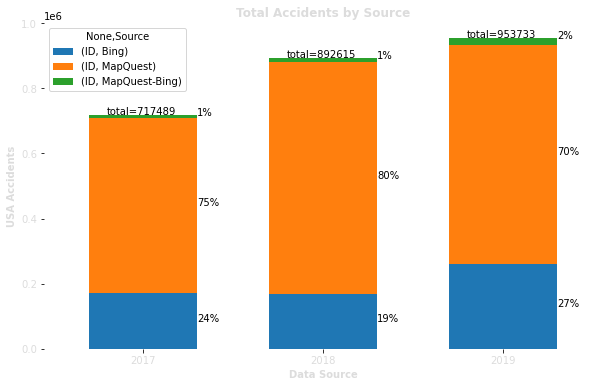

In [351]:
# setting up bar plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
 
plot_ser=source_df # data for plot
# plot
plot1=plot_ser.plot.bar(rot=0,width=0.6, stacked=True)

plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
plt.xlabel('Data Source', fontweight="bold", color=color_t)
plt.ylabel('USA Accidents',fontweight='bold', color=color_t)
plt.title("Total Accidents by Source", fontweight="bold", color=color_t)
plt.yticks(color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
# loop to anotate values on the plot
for i, r in plot_ser.iterrows():
#    off=50000
    d1=r[0]
    d2=r[1]
    d3=r[2]
    d=d1+d2+d3
    plt.text(i-2017+.3, y =d1/2 , s=f"{(d1/d*100):.0f}%" , fontdict=dict(fontsize=10))
    plt.text(i-2017+.3, y =d1+d2/2 , s=f"{(d2/d*100):.0f}%" , fontdict=dict(fontsize=10))
    plt.text(i-2017+0.3, y =d3+d1+d2 , s=f"{(d3/d*100):.0f}%" , fontdict=dict(fontsize=10))
    plt.text(i-2017-0.2, y =d3+d1+d2+1000 , s=f"total={d}" , fontdict=dict(fontsize=10))
# Save chart as PNG
plt.savefig('../Analysis/output/YK_US_accidents_source_bar.png', facecolor='dimgray')

In [ ]:
## Data ditribution by State by year 

In [316]:
state_df=traffic_df.groupby(['State','Year']).agg({'ID':'count'}).unstack('Year') # unstacking so we can plot easily
state_df

ID                
Year     2017    2018    2019
State                        
AL       2904   14096   19239
AR        134     598     991
AZ      12329   22700   24528
CA     152663  156784  213362
CO       7092   14123   17588
CT       6735    6413    5455
DC        763     951    1484
DE        891    1644    1620
FL      60672   65741   60305
GA      22059   24611   23712
IA       3016    2483    2842
ID        368     418     554
IL      25288   24062   19961
IN       6946   13701    7767
KS       1734    2396    1995
KY       3277    7947    6832
LA      12234   20424   18976
MA       9044    9426    9344
MD      12336   11003   12451
ME        591     703     636
MI      27423   24286   20350
MN      10428   20213   29524
MO       7373    8756    9127
MS       1036    2537    1985
MT        133     152     157
NC      34095   56230   45992
ND          4      19      17
NE       6203    5851    4642
NH       2030    2501    2218
NJ      14070   14952   13003
NM       1140    2112    1616
NV       2503    2662    3002
NY      36876   37959   42936
OH      13652   17647   13233
OK       9761   20483   20482
OR       6167   22495   41172
PA      26874   22221   20100
RI       2858    3247    2973
SC      28326   56360   58991
SD         12      13      27
TN      11007   24463   21131
TX      85540   84049   78709
UT       4650   11153   24616
VA      20736   27030   25702
VT        155     188     224
WA      18446   18911   14688
WI       4103    5030    6889
WV        700     672     473
WY        112     199     112

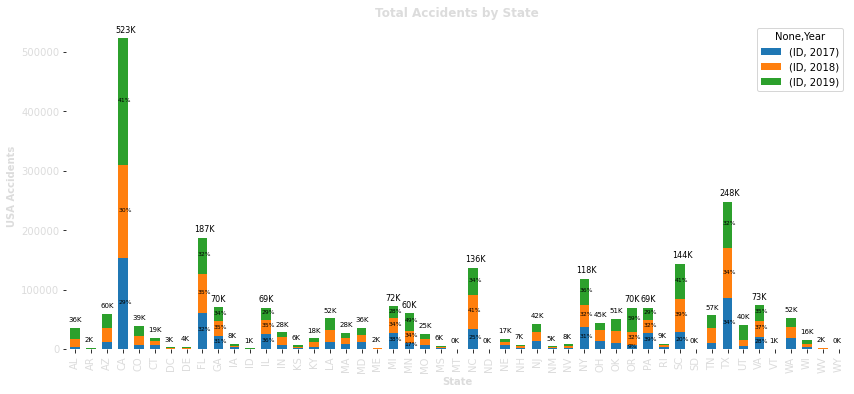

In [350]:
# setting up bar plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 6
 
plot_ser=state_df # data for plot
# plot
plot1=plot_ser.plot.bar(rot=90,width=0.6, stacked=True)

plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
plt.xlabel('State', fontweight="bold", color=color_t)
plt.ylabel('USA Accidents',fontweight='bold', color=color_t)
plt.title("Total Accidents by State", fontweight="bold", color=color_t)
plt.yticks(color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
# loop to anotate values on the plot
c=0
for i, r in plot_ser.iterrows():
    d1=r[0]
    d2=r[1]
    d3=r[2]
    d=d1+d2+d3
    if d>60000:
        plt.text(c-.3, y =d1/2 , s=f"{(d1/d*100):.0f}%" , fontdict=dict(fontsize=6))
        plt.text(c-.3, y =d1+d2/2 , s=f"{(d2/d*100):.0f}%" , fontdict=dict(fontsize=6))
        plt.text(c-.3, y =d3/2+d1+d2 , s=f"{(d3/d*100):.0f}%" , fontdict=dict(fontsize=6))
        plt.text(c-.5, y =d3+d1+d2+10000 , s=f"{d/1000:.0f}K" , fontdict=dict(fontsize=8))
    else:
        plt.text(c-.4, y =d3+d1+d2+10000 , s=f"{d/1000:.0f}K" , fontdict=dict(fontsize=7))
    c+=1
# Save chart as PNG
plt.savefig('../Analysis/output/YK_US_accidents_States_bar.png', facecolor='dimgray')

In [19]:
# traffic_df.columns # debug print

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year'],
      dtype='object')

In [9]:
traffic_df['Start_Time'][0]

'2017-01-01 00:17:36'

In [131]:
date_df=pd.DataFrame()
date_df['date_time_obj']=pd.to_datetime(traffic_df['Start_Time'])

In [132]:
date_df['Date']=date_df['date_time_obj'].dt.date

In [133]:
date_df['Year']=date_df['date_time_obj'].dt. year

In [134]:
date_df['Month']=date_df['date_time_obj'].dt. month

In [135]:
date_df['Weekday']=date_df['date_time_obj'].dt.weekday

In [136]:
date_df['Severity']=traffic_df['Severity']

In [137]:
date_df['ID']=traffic_df['ID']

In [138]:
date_df

,date_time_obj,Date,Year,Month,Weekday,Severity,ID
0,2017-01-01 00:17:36,2017-01-01,2017,1,6,3,A-9207
1,2017-01-01 00:26:08,2017-01-01,2017,1,6,3,A-9208
2,2017-01-01 00:53:41,2017-01-01,2017,1,6,2,A-9209
3,2017-01-01 01:18:51,2017-01-01,2017,1,6,3,A-9210
4,2017-01-01 01:20:12,2017-01-01,2017,1,6,3,A-9211
...,...,...,...,...,...,...,...
2563832,2019-08-23 18:03:25,2019-08-23,2019,8,4,2,A-3513776
2563833,2019-08-23 19:11:30,2019-08-23,2019,8,4,2,A-3513777
2563834,2019-08-23 19:00:21,2019-08-23,2019,8,4,2,A-3513778
2563835,2019-08-23 19:00:21,2019-08-23,2019,8,4,2,A-3513779


In [210]:
year_rate=date_df.groupby(['Year','Month']).agg({'Date':'count'})
year_rate

Date
Year Month        
2017 1       55680
     2       51640
     3       57283
     4       48087
     5       41106
     6       46221
     7       43226
     8       80878
     9       76820
     10      74905
     11      70074
     12      71569
2018 1       74999
     2       71464
     3       74423
     4       72592
     5       76475
     6       67777
     7       65749
     8       76381
     9       73277
     10      87195
     11      82078
     12      70205
2019 1       79276
     2       74559
     3       69401
     4       73001
     5       73864
     6       65501
     7       68234
     8       75246
     9       87659
     10     106817
     11      81894
     12      98281

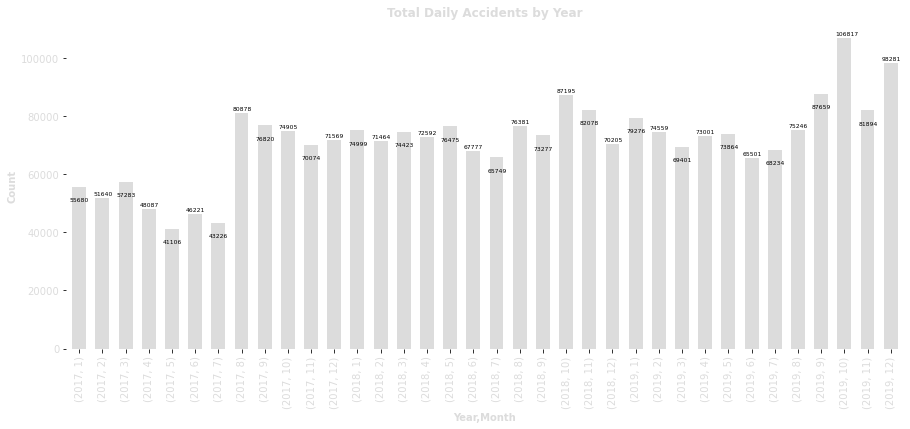

In [357]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 6
plot5= plt.subplot(111)
plot5.spines["top"].set_visible(False)    
plot5.spines["bottom"].set_visible(False)    
plot5.spines["right"].set_visible(False)    
plot5.spines["left"].set_visible(False)
color_t='gainsboro'
plt.xlabel('Year', fontweight="bold", color=color_t)
plt.ylabel('USA Daily Accident Rate',fontweight='bold', color=color_t)
plt.title("Total Daily Accidents by Year", fontweight="bold", color=color_t)
plt.yticks(color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
plot_ser=year_rate['Date']
plot5=plot_ser.plot.bar(rot=90,color=color_t,width=0.6)
for i,d in enumerate(plot_ser):
    if i%2==0:
        off=5000
    else:
        off=-1000
    plt.text(x=i-.4 , y =d-off , s=f"{d}" , fontdict=dict(fontsize=6))
plt.ylabel('Count')    

# Save chart as PNG
plt.savefig('../Analysis/output/YK_US_accidents_yearmonth_bar.png', facecolor='dimgray')

In [232]:
#date_df.drop(date_df.loc[date_df['Year']==2017].index)
date_df=date_df[date_df['Year']!=2017]

In [233]:
month_rate=date_df.groupby(['Month']).agg({'Date':'count'})

In [234]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

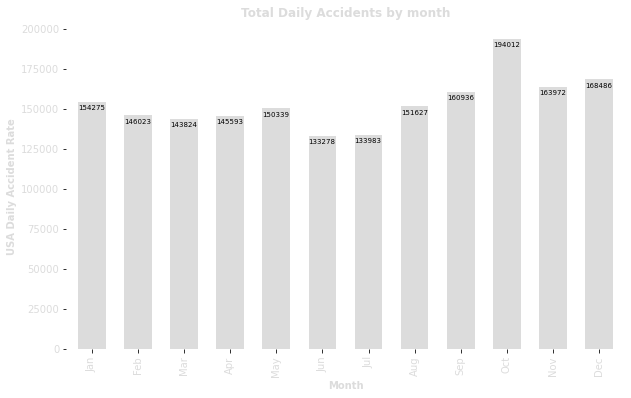

In [255]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
x=month_rate.index
y=month_rate['Date']
plot5=month_rate['Date'].plot.bar(rot=90,color=color_t,width=0.6)
plt.title("Total Daily Accidents by month", fontweight="bold", color=color_t)    
plt.xlabel('Month', fontweight="bold", color=color_t)
plt.ylabel('USA Daily Accident Rate',fontweight='bold', color=color_t)
plt.yticks( color=color_t,fontsize=10)    
plt.xticks(range(0,12),months, color=color_t,fontsize=10)
for i,d in enumerate(month_rate['Date']):
    plt.text(x=i-.3 , y =d-5000 , s=f"{d}" , fontdict=dict(fontsize=7))

In [236]:
weekday_rate=date_df.groupby(['Weekday']).agg({'Date':'count','Month':'mean'})
weekday_rate

,Date,Month
Weekday,,
0,317607,6.763166
1,336135,6.638901
2,329709,6.606947
3,317788,6.536719
4,331607,6.738944
5,113394,7.045293
6,100108,7.068976


In [244]:
daily_accidents={}
daily_stats=pd.DataFrame()
for i in range(0,7):
    daily_accidents[i]=date_df.loc[date_df['Weekday']==i].groupby(['Date']).agg({'Date':'count', 'Year':'mean','Month':'mean'})
    daily_stats[i]=daily_accidents[i].describe()['Date']

In [245]:
weekdays=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
daily_stats

,0,1,2,3,4,5,6
count,105.000000,105.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,3024.828571,3201.285714,3170.278846,3055.653846,3188.528846,1090.326923,962.576923
std,522.612253,567.777139,569.834135,694.692287,513.534959,357.275109,303.716196
min,980.000000,682.000000,1278.000000,985.000000,1668.000000,2.000000,202.000000
25%,2770.000000,2872.000000,2879.250000,2832.000000,2872.500000,904.750000,789.250000
50%,2941.000000,3115.000000,3110.500000,3080.500000,3102.000000,982.000000,887.000000
75%,3297.000000,3526.000000,3476.000000,3387.250000,3463.250000,1114.250000,992.500000
max,4420.000000,4626.000000,4883.000000,4566.000000,4568.000000,2245.000000,2092.000000


In [246]:
daily_accidents[0]

,Date,Year,Month
Date,,,
2018-01-01,980,2018,1
2018-01-08,3752,2018,1
2018-01-15,2776,2018,1
2018-01-22,2822,2018,1
2018-01-29,3115,2018,1
...,...,...,...
2019-12-02,2753,2019,12
2019-12-09,4420,2019,12
2019-12-16,3795,2019,12



 0  
 iqr= 527.0
 UPPER OUTLIER   
 {0:             Date  Year  Month
Date                         
2019-10-21  4151  2019     10
2019-12-09  4420  2019     12
2019-12-23  4303  2019     12}
 LOWER OUTLIER   
 {0:             Date  Year  Month
Date                         
2018-01-01   980  2018      1
2018-05-28  1860  2018      5
2018-09-03  1644  2018      9
2019-05-27  1734  2019      5}
----------------------------------------

 1  
 iqr= 654.0
 UPPER OUTLIER   
 {0:             Date  Year  Month
Date                         
2019-10-21  4151  2019     10
2019-12-09  4420  2019     12
2019-12-23  4303  2019     12, 1:             Date  Year  Month
Date                         
2019-11-12  4626  2019     11}
 LOWER OUTLIER   
 {0:             Date  Year  Month
Date                         
2018-01-01   980  2018      1
2018-05-28  1860  2018      5
2018-09-03  1644  2018      9
2019-05-27  1734  2019      5, 1:             Date  Year  Month
Date                         
2018-12-25

<function matplotlib.pyplot.show(*args, **kw)>

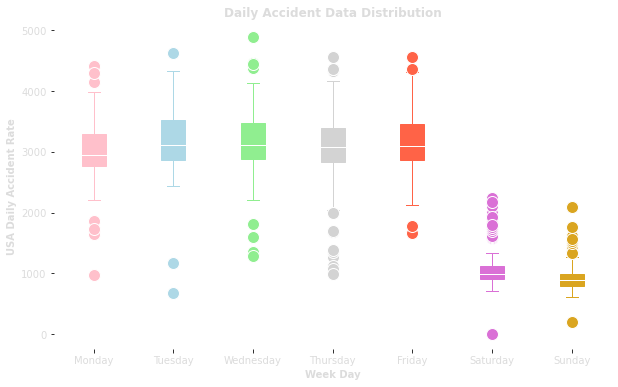

In [392]:
# forming Data frame to hold outliers and lower upper quartiles
upper_out_df=pd.DataFrame()
lower_out_df=pd.DataFrame()
lower25_df=pd.DataFrame()
upper25_df=pd.DataFrame()
upper_outlier={}
lower_outlier={}
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
colors = ['pink', 'lightblue', 'lightgreen', 'lightgrey','tomato','orchid','goldenrod']    # colors for plot
for i in range(0,7):                                
    data=daily_accidents[i]['Date'] 
    upperq =daily_stats[i]['75%']
    lowerq =daily_stats[i]['25%']
    iqr = upperq - lowerq                                    # iqr                      
    upper_outlier[i]=daily_accidents[i].loc[data>upperq+iqr*1.5]  # finding and storing all upper outliers
    upper_out_df=upper_out_df.append(upper_outlier[i])
    lower_outlier[i]=daily_accidents[i].loc[data<lowerq-iqr*1.5]  # finding and storing all lower outliers
    lower_out_df=lower_out_df.append(lower_outlier[i])
    lower25_df=lower25_df.append(daily_accidents[i].loc[data<lowerq])# finding and storing all dates with lower than lower quartile
    upper25_df=upper25_df.append(daily_accidents[i].loc[data>upperq])# finding and storing all dates with higher than 75 quartile
    # printing results
    print('\n\033[1m\033[4m', i,'\033[0m \n','\033[1miqr=\033[0m',iqr)
    if upper_outlier[i].empty:
        print('\033[1m UPPER OUTLIER \033[0m ','NO OUTLIERS')
    else:
        print('\033[1m UPPER OUTLIER \033[0m ','\n',upper_outlier)
    if lower_outlier[i].empty:
        print('\033[1m LOWER OUTLIER \033[0m ','NO OUTLIERS')
    else:
        print('\033[1m LOWER OUTLIER \033[0m ','\n',lower_outlier)
    print("-"*40)
    c=colors[i]                             # color for each regiment chart
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# "Data-Ink Ratio" applied
    plot1.boxplot(data, 
                  patch_artist=True, widths=0.3,labels=[i],
                  boxprops=dict(facecolor=c, color=c),
                  capprops=dict(color=c),
                  whiskerprops=dict(color=c),
                  flierprops=dict(marker='o',markerfacecolor=c,markeredgecolor="white",markersize=12, label="shown"),
                  medianprops=dict(color='white'),
                  positions=[i])

plt.title("Daily Accident Data Distribution", fontweight="bold", color=color_t)    
plt.xlabel('Week Day', fontweight="bold", color=color_t)
plt.ylabel('USA Daily Accident Rate',fontweight='bold', color=color_t)
plt.yticks( color=color_t,fontsize=10)    
plt.xticks(range(0,7),weekdays, color=color_t,fontsize=10)
#plt.label()
plt.show


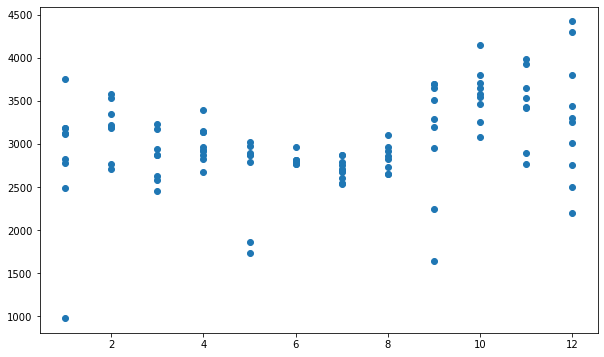

In [248]:
plot2=plt.scatter(daily_accidents[0]['Month'],daily_accidents[0]['Date'])

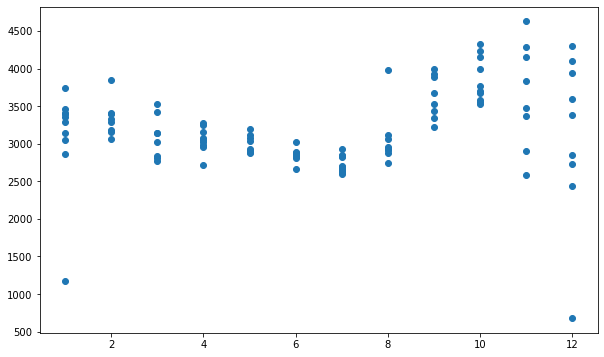

In [249]:
y=daily_accidents[1]['Date']
plot2=plt.scatter(daily_accidents[1]['Month'],y)

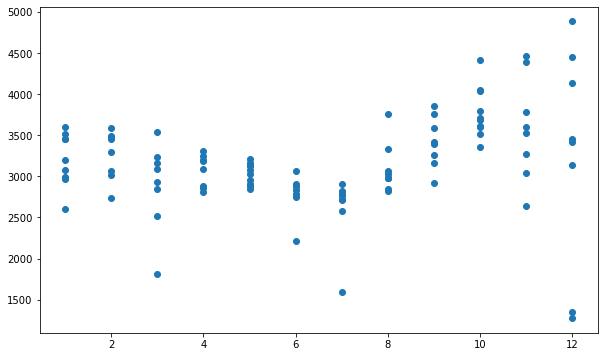

In [250]:
plot2=plt.scatter(daily_accidents[2]['Month'],daily_accidents[2]['Date'] )

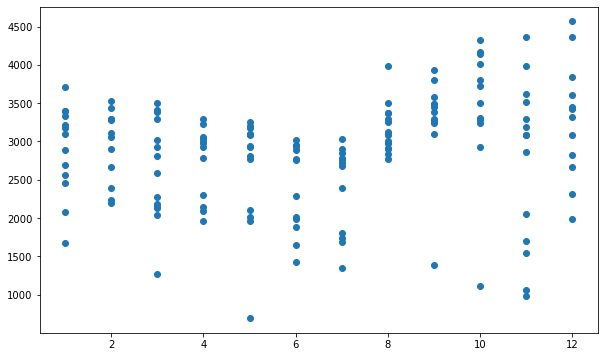

In [243]:
plot2=plt.scatter(daily_accidents[3]['Month'],daily_accidents[3]['Date'] )

In [356]:
#import US holidays data
path="../data/US_holidays.csv"
holidays_df=pd.read_csv(path)
holidays_df


,Date,US Holiday
0,2017-01-02,New Year's Day
1,2017-01-16,Martin Luther King Jr. Day
2,2017-05-29,Memorial Day
3,2017-07-04,Independence Day
4,2017-09-04,Labor Day
5,2017-11-10,Veterans Day
6,2017-11-23,Thanksgiving
7,2017-12-25,Christmas Day
8,2018-01-01,New Year's Day
9,2018-01-15,Martin Luther King Jr. Day


In [369]:
# preparing to merge on DATE - making it same datetime object.date
holidays_df['Date']=pd.to_datetime(holidays_df['Date']).dt.date

In [397]:
#rename date colum which actually counts days , so we can merge on index "Date"
upper_out_df=upper_out_df.rename(columns={"Date":"Accidents Count Upper Outlier"})
upper_out_df
upper25_df=upper25_df.rename(columns={"Date":"Accidents Count Upper quartile"})
upper25_df

,Accidents Count Upper quartile,Year,Month
Date,,,
2018-01-08,3752,2018,1
2018-02-05,3343,2018,2
2018-04-23,3391,2018,4
2018-10-01,3544,2018,10
2018-10-15,3464,2018,10
...,...,...,...
2019-11-10,1537,2019,11
2019-12-08,2092,2019,12
2019-12-15,1770,2019,12


In [398]:
#rename date colum which actually counts days , so we can merge on index "Date"
lower_out_df=lower_out_df.rename(columns={"Date":"Accidents Count lower outlier"})
lower_out_df
lower25_df=lower25_df.rename(columns={"Date":"Accidents Count lower quartile"})
lower25_df

,Accidents Count lower quartile,Year,Month
Date,,,
2018-01-01,980,2018,1
2018-02-19,2761,2018,2
2018-05-28,1860,2018,5
2018-07-02,2605,2018,7
2018-07-09,2749,2018,7
...,...,...,...
2018-12-16,728,2018,12
2019-03-17,787,2019,3
2019-04-28,783,2019,4


In [380]:
# merge holidays wtih outliers ( 2017 is removed from data set  )
holidays_df.merge(lower_out_df,how='inner', on='Date')
# clearley almost all holidays in lower outliers

,Date,US Holiday,Accidents Count lower outlier,Year,Month
0,2018-01-01,New Year's Day,980,2018,1
1,2018-05-28,Memorial Day,1860,2018,5
2,2018-07-04,Independence Day,1593,2018,7
3,2018-09-03,Labor Day,1644,2018,9
4,2018-12-25,Christmas Day,682,2018,12
5,2019-01-01,New Year's Day,1177,2019,1
6,2019-05-27,Memorial Day,1734,2019,5
7,2019-07-04,Independence Day,1350,2019,7
8,2019-11-28,Thanksgiving,985,2019,11
9,2019-12-25,Christmas Day,1278,2019,12


In [399]:
# none in upper outlier range
holidays_df.merge(upper_out_df,how='inner', on='Date')

,Date,US Holiday,Accidents Count Upper Outlier,Year,Month


In [395]:
# almost all fit in lower quartile
holidays_df.merge(lower25_df,how='left', on='Date')

,Date,US Holiday,Accidents Count lower quartile,Year,Month
0,2017-01-02,New Year's Day,NaN,NaN,NaN
1,2017-01-16,Martin Luther King Jr. Day,NaN,NaN,NaN
2,2017-05-29,Memorial Day,NaN,NaN,NaN
3,2017-07-04,Independence Day,NaN,NaN,NaN
4,2017-09-04,Labor Day,NaN,NaN,NaN
5,2017-11-10,Veterans Day,NaN,NaN,NaN
6,2017-11-23,Thanksgiving,NaN,NaN,NaN
7,2017-12-25,Christmas Day,NaN,NaN,NaN
8,2018-01-01,New Year's Day,980.0,2018.0,1.0
9,2018-01-15,Martin Luther King Jr. Day,NaN,NaN,NaN
